# Exercise 1
## Linear regression with one variable

### 2.1 Plotting the Data

In [247]:
import pandas as pd 

dataset = pd.read_csv('ex1data1.txt', header=None, names=['population', 'profit'])
print(dataset.head())

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


In [248]:
X = dataset.iloc[:,0]
y = dataset.iloc[:,1]
m = len(y)

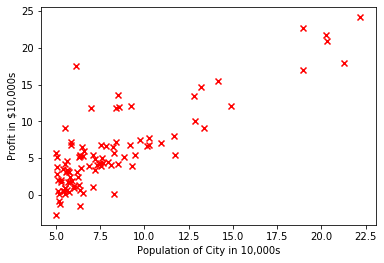

In [249]:
import matplotlib.pyplot as plt

plt.scatter(X, y, marker='x', c='red')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.show()

### Adding the intercept term

In [250]:
import numpy as np
print(f'X initial type: {type(X)}')
X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
print(X[:5])
print(f'X final type: {type(X)}')
print(theta)


X initial type: <class 'pandas.core.series.Series'>
[[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]]
X final type: <class 'numpy.ndarray'>
[[0.]
 [0.]]


In [251]:
alpha = 0.01
iterations = 1500
ones = np.ones((m,1))
X = np.hstack((ones, X)) # adding the intercept term
print(type(X))
print(X[:5])

<class 'numpy.ndarray'>
[[1.     6.1101]
 [1.     5.5277]
 [1.     8.5186]
 [1.     7.0032]
 [1.     5.8598]]


### Computing the cost

In [252]:
def computeCost(X, y, theta):
    '''check page 10 of "2 Linear regression with one variable"
    '''
    m = len(y)
    err = np.dot(X, theta) - y
    return np.sum(np.power(err, 2)) / (2*m)

In [253]:
J = computeCost(X, y, theta)
print(J)

32.072733877455676


### Gradient descent

In [254]:
def gradientDescent(X, y, theta_initial, alpha, iterations):
    ''' check "2 Linear regression with one variable"
    page 36
    '''
    m = len(y)
    theta = theta_initial.copy()
    J_val = []
    for i in range(iterations):
        J = np.dot(X, theta) - y
        error = np.dot(X.T, J)
        descent = alpha*1/m*error
        theta -= descent
        J_val.append(computeCost(X, y, theta))
    return theta, J_val

Final theta value after gradient descent : [[-3.63029144]
 [ 1.16636235]]
The cost value using the computed theta value : 4.4834. Compare this with the previous value, 32.0727, when the theta was 0, 0.


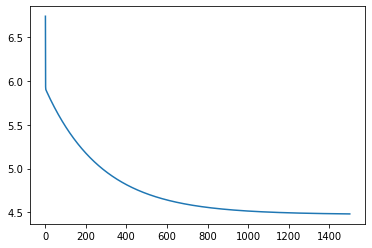

In [255]:
theta1, J_value = gradientDescent(X, y, alpha=alpha, iterations=iterations, theta_initial=theta)
print(f'Final theta value after gradient descent : {theta1}')
print(f'The cost value using the computed theta value : {computeCost(X, y, theta1):.4f}. Compare this with the previous value, {computeCost(X, y, theta):.4f}, when the theta was 0, 0.')
plt.plot(np.arange(1,iterations+1), J_value)
plt.show()

In [256]:
# calculate profit based on theta1
population = [3.5, 7] # 35000 and 70000 people
for pop in population:
    print(f'Expected profit in a city with {int(pop*10000)} people is ${int(np.dot([1,pop], theta1)[0]*10000)}')

Expected profit in a city with 35000 people is $4519
Expected profit in a city with 70000 people is $45342


### Plot with the best fit line

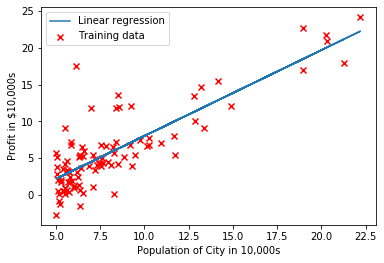

In [258]:
# plot with the best fit line
plt.scatter(X[:,1], y, marker='x', c='red', label='Training data')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.plot(X[:,1], np.dot(X, theta1), label='Linear regression')
plt.legend()
plt.show()

### (Optional)

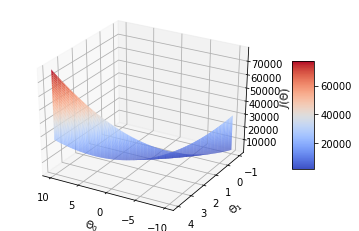

In [259]:
# from https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-linear-regression-dd04fba8e137

from mpl_toolkits.mplot3d import Axes3D
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
#rotate for better angle
ax.view_init(30,120)

## Linear regression for multiple variables

In [260]:
# Linear regression for multiple variables
dataset2 = pd.read_csv('ex1data2.txt', header=None, names=['size', 'bedrooms', 'price'])
print(dataset2.head())

   size  bedrooms   price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900


### Feature Normalization

In [261]:
X = dataset2.iloc[:,0:2] 
y = dataset2.iloc[:,2]
m = len(y)
X_scaled = (X - np.mean(X))/np.std(X)

### Adding the intercept term and initializing the parameters

In [262]:
ones = np.ones((m2,1))
X_scaled = np.hstack((ones, X_scaled))
alpha = 0.01
iterations = 400
theta = np.zeros((3,1))
y = y[:,np.newaxis]

### Computing the cost

In [263]:
J = computeCost(X_scaled, y, theta)
print(J)

65591548106.45744


### Finding optimum parameters using gradient descent

In [264]:
theta1, J_values = gradientDescent(X_scaled, y, theta, alpha, iterations)
print(theta1)

[[334302.06399328]
 [ 99411.44947359]
 [  3267.01285407]]


In [265]:
J = computeCostMulti(X_scaled, y, theta1)
print(J)

2105448288.6292474
